In [2]:
import nltk
#from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
#from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import bz2

C:\Users\jpini\AppData\Local\Temp\ipykernel_19720\2841965325.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import math
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow import keras
import os

In [5]:
'''# Define tu token
API_KEY = "83fa12351eb358493c952697bfa9cb7606427f817602e085b98382fafd05e72c"

# Definir la URL del servicio con el token incluido
service_url = f"http://data.phishtank.com/data/{API_KEY}/online-valid.json.bz2"

# Realizar una solicitud POST para obtener los datos en formato BZ2
response = requests.post(service_url)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    # Descomprimir los datos BZ2
    compressed_data = response.content
    decompressed_data = bz2.decompress(compressed_data).decode('utf-8')
    
    # Convertir los datos JSON en un diccionario Python
    phishing_data = json.loads(decompressed_data)

    # Analizar y trabajar con los datos según sea necesario
    print(phishing_data)
else:
    print("Error al obtener los datos:", response.status_code)'''


'# Define tu token\nAPI_KEY = "83fa12351eb358493c952697bfa9cb7606427f817602e085b98382fafd05e72c"\n\n# Definir la URL del servicio con el token incluido\nservice_url = f"http://data.phishtank.com/data/{API_KEY}/online-valid.json.bz2"\n\n# Realizar una solicitud POST para obtener los datos en formato BZ2\nresponse = requests.post(service_url)\n\n# Verificar si la solicitud fue exitosa (código de estado 200)\nif response.status_code == 200:\n    # Descomprimir los datos BZ2\n    compressed_data = response.content\n    decompressed_data = bz2.decompress(compressed_data).decode(\'utf-8\')\n    \n    # Convertir los datos JSON en un diccionario Python\n    phishing_data = json.loads(decompressed_data)\n\n    # Analizar y trabajar con los datos según sea necesario\n    print(phishing_data)\nelse:\n    print("Error al obtener los datos:", response.status_code)'

In [11]:
# Cambio de dataset
#https://www.kaggle.com/datasets/pilarpieiro/tabular-dataset-ready-for-malicious-url-detection
# Obtener la ruta del script actual
script_path = os.getcwd()

# Construir la ruta relativa al archivo CSV desde el script actual
path = os.path.join(script_path, 'Dataset\\train_dataset.csv')

phishing_data = pd.read_csv(path)
phishing_data.describe()


,label,url_has_login,url_has_client,url_has_server,url_has_admin,url_has_ip,url_isshorted,url_len,url_entropy,url_hamming_1,...,pdomain_len,pdomain_count_hyphen,pdomain_count_atrate,pdomain_count_non_alphanum,pdomain_count_digit,tld_len,tld_is_sus,pdomain_min_distance,subdomain_len,subdomain_count_dot
count,6.728848e+06,6.728848e+06,6.728848e+06,6.728848e+06,6.728848e+06,6.728848e+06,6.728848e+06,6.728848e+06,6.728848e+06,6.728848e+06,...,6.728848e+06,6.728848e+06,6.728848e+06,6.728848e+06,6.728848e+06,6.728848e+06,6.728848e+06,6.728848e+06,6.728848e+06,6.728848e+06
mean,2.148470e-01,1.562987e-02,2.001531e-03,2.242137e-03,3.648916e-03,3.619342e-03,5.041279e-02,2.375615e+01,3.526806e+00,5.344584e-01,...,7.831950e-05,8.916831e-07,2.972277e-07,1.263218e-05,2.615604e-05,3.102813e+00,8.032742e-02,6.647128e+00,2.272318e+00,4.740574e-02
std,4.107162e-01,1.240386e-01,4.469369e-02,4.729810e-02,6.029595e-02,6.005200e-02,2.187952e-01,3.337858e+01,4.597844e-01,2.811646e-02,...,4.065377e-02,1.219073e-03,7.710093e-04,6.058669e-03,1.608065e-02,1.128592e+00,2.717994e-01,3.770186e+00,6.371737e+00,3.166550e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,-0.000000e+00,2.777778e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300000e+01,3.238901e+00,5.168269e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,3.506891e+00,5.351562e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01,3.788755e+00,5.526316e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.394000e+03,5.378801e+00,7.350746e-01,...,5.800000e+01,2.000000e+00,2.000000e+00,5.000000e+00,1.100000e+01,2.900000e+01,1.000000e+00,6.100000e+01,2.370000e+02,3.700000e+01


In [12]:
df=pd.DataFrame(phishing_data)  #0 no es phishing - 1 es phishing
df

,url,label,source,url_has_login,url_has_client,url_has_server,url_has_admin,url_has_ip,url_isshorted,url_len,...,pdomain_count_hyphen,pdomain_count_atrate,pdomain_count_non_alphanum,pdomain_count_digit,tld_len,tld,tld_is_sus,pdomain_min_distance,subdomain_len,subdomain_count_dot
0,irs-profilepaymentservice.com/home,1,phishtank,0,0,0,0,0,0,34,...,0,0,0,0,3,com,0,17,0,0
1,cpuggsukabumi.id,0,majestic_million,0,0,0,0,0,0,16,...,0,0,0,0,2,id,1,10,0,0
2,members.tripod.com/~don_rc/ring.htm,0,data_clean_test_mendel,0,0,0,0,0,0,35,...,0,0,0,0,3,com,0,2,7,0
3,optuswebmailadminprovider.weebly.com/,1,phishtank,0,0,0,1,0,0,37,...,0,0,0,0,3,com,0,3,25,0
4,topoz.com.pl,0,dmoz_harvard,0,0,0,0,0,0,12,...,0,0,0,0,6,com.pl,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6728843,detektei-ivanov.weebly.com,0,dmoz_harvard,0,0,0,0,0,0,26,...,0,0,0,0,3,com,0,3,15,0
6728844,chase.trustbnkdirect.com/myaccount/access.php?...,1,ALL-phishing-links,0,0,0,0,0,1,113,...,0,0,0,0,3,com,0,10,5,0
6728845,image.gsfc.nasa.gov,0,domcop,0,0,0,0,0,0,19,...,0,0,0,0,3,gov,0,2,10,1
6728846,unregistered-device.cc/,1,phishtank,0,0,0,0,0,0,23,...,0,0,0,0,2,cc,1,13,0,0


In [64]:
df.columns

Index(['url', 'label', 'source', 'url_has_login', 'url_has_client',
       'url_has_server', 'url_has_admin', 'url_has_ip', 'url_isshorted',
       'url_len', 'url_entropy', 'url_hamming_1', 'url_hamming_00',
       'url_hamming_10', 'url_hamming_01', 'url_hamming_11', 'url_2bentropy',
       'url_3bentropy', 'url_count_dot', 'url_count_https', 'url_count_http',
       'url_count_perc', 'url_count_hyphen', 'url_count_www',
       'url_count_atrate', 'url_count_hash', 'url_count_semicolon',
       'url_count_underscore', 'url_count_ques', 'url_count_equal',
       'url_count_amp', 'url_count_letter', 'url_count_digit',
       'url_count_sensitive_financial_words', 'url_count_sensitive_words',
       'url_nunique_chars_ratio', 'path_len', 'path_count_no_of_dir',
       'path_count_no_of_embed', 'path_count_zero', 'path_count_pertwent',
       'path_has_any_sensitive_words', 'path_count_lower', 'path_count_upper',
       'path_count_nonascii', 'path_has_singlechardir', 'path_has_upperdir'

In [29]:
df['verified'].nunique()

1

In [113]:
df_cleaned=df.iloc[:,0:2]
df_cleaned = df_cleaned.iloc[:1000000,:]
df_cleaned2 = df.iloc [:2000000,1:13]
df_cleaned2.drop(columns='source',inplace=True)

In [114]:
df_cleaned2

,label,url_has_login,url_has_client,url_has_server,url_has_admin,url_has_ip,url_isshorted,url_len,url_entropy,url_hamming_1,url_hamming_00
0,1,0,0,0,0,0,0,34,4.010134,0.540441,0.106618
1,0,0,0,0,0,0,0,16,3.452820,0.531250,0.109375
2,0,0,0,0,0,0,0,35,4.000432,0.553571,0.096429
3,1,0,0,0,1,0,0,37,4.175273,0.537162,0.108108
4,0,0,0,0,0,0,0,12,2.855389,0.562500,0.093750
...,...,...,...,...,...,...,...,...,...,...,...
1999995,1,0,0,0,0,0,0,62,4.661632,0.506048,0.127016
1999996,0,0,0,0,0,0,0,16,3.125000,0.515625,0.117188
1999997,0,0,0,0,0,0,0,19,3.426367,0.585526,0.092105
1999998,0,0,0,0,0,0,0,18,3.572431,0.527778,0.104167


In [115]:
tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(df_cleaned["url"])

In [116]:
df_cleaned['text sequences']=tokenizer.texts_to_sequences(df_cleaned['url'])
df_cleaned

,url,label,text sequences
0,irs-profilepaymentservice.com/home,1,"[1, 41]"
1,cpuggsukabumi.id,0,[21]
2,members.tripod.com/~don_rc/ring.htm,0,"[129, 43, 1, 13]"
3,optuswebmailadminprovider.weebly.com/,1,"[92, 1]"
4,topoz.com.pl,0,"[1, 20]"
...,...,...,...
999995,swyhrie9.qwo231sdx.club,1,"[141, 60]"
999996,hom114.co.kr,0,"[3, 101]"
999997,enessay.com/,0,[1]
999998,elevatedthird.com,0,[1]


In [117]:
df_cleaned['text sequences_length']=df_cleaned['text sequences'].apply(lambda t: len(t))
df_cleaned

,url,label,text sequences,text sequences_length
0,irs-profilepaymentservice.com/home,1,"[1, 41]",2
1,cpuggsukabumi.id,0,[21],1
2,members.tripod.com/~don_rc/ring.htm,0,"[129, 43, 1, 13]",4
3,optuswebmailadminprovider.weebly.com/,1,"[92, 1]",2
4,topoz.com.pl,0,"[1, 20]",2
...,...,...,...,...
999995,swyhrie9.qwo231sdx.club,1,"[141, 60]",2
999996,hom114.co.kr,0,"[3, 101]",2
999997,enessay.com/,0,[1],1
999998,elevatedthird.com,0,[1],1


In [118]:
df_cleaned.head()

,url,label,text sequences,text sequences_length
0,irs-profilepaymentservice.com/home,1,"[1, 41]",2
1,cpuggsukabumi.id,0,[21],1
2,members.tripod.com/~don_rc/ring.htm,0,"[129, 43, 1, 13]",4
3,optuswebmailadminprovider.weebly.com/,1,"[92, 1]",2
4,topoz.com.pl,0,"[1, 20]",2


In [119]:
df_cleaned['url']

0            irs-profilepaymentservice.com/home
1                              cpuggsukabumi.id
2           members.tripod.com/~don_rc/ring.htm
3         optuswebmailadminprovider.weebly.com/
4                                  topoz.com.pl
                          ...                  
999995                  swyhrie9.qwo231sdx.club
999996                             hom114.co.kr
999997                             enessay.com/
999998                        elevatedthird.com
999999                               asfar.org/
Name: url, Length: 1000000, dtype: object

In [120]:
X = pad_sequences(df_cleaned["text sequences"], maxlen=max(df_cleaned["text sequences_length"]))

In [121]:
df_x= pd.DataFrame(X)

In [122]:
df_x.shape[0]

1000000

In [123]:
df_x['label']=np.ones(df_x.shape[0])
df_x

,0,1,2,3,4,5,6,7,8,9,...,798,799,800,801,802,803,804,805,806,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,41,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,21,1.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,129,43,1,13,1.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,92,1,1.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,20,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,141,60,1.0
999996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,101,1.0
999997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1.0
999998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1.0


In [124]:
'''y=df_x['label']
X=df_x.drop(columns='label')'''
y=df_cleaned2['label']
X=df_cleaned2.drop(columns='label')

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [126]:
from sklearn.decomposition import PCA
n_components=5
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [127]:
pca.explained_variance_ratio_.cumsum()

array([0.99978989, 0.99993289, 0.9999758 , 0.99998857, 0.99999184])

In [128]:
n_features=5

In [129]:
model = Sequential()
model.add(Dense(8, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\jpini\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [130]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [131]:
loss_per_epoch=[]
accuracy_per_epoch=[]
num_epochs=6

for epoch in range(num_epochs):
    # Entrenamiento por época
    history = model.fit(
      X_train_pca,y_train,epochs=1
    )

    # Almacenar la pérdida y la métrica (precisión en este caso) por época
    loss_per_epoch.append(history.history['loss'][0])
    accuracy_per_epoch.append(history.history['accuracy'][0])

50000/50000 ━━━━━━━━━━━━━━━━━━━━ 83s 2ms/step - accuracy: 0.8380 - loss: 0.3771
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - accuracy: 0.8418 - loss: 0.3605
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - accuracy: 0.8463 - loss: 0.3579
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - accuracy: 0.8474 - loss: 0.3564
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 83s 2ms/step - accuracy: 0.8478 - loss: 0.3561
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - accuracy: 0.8493 - loss: 0.3547


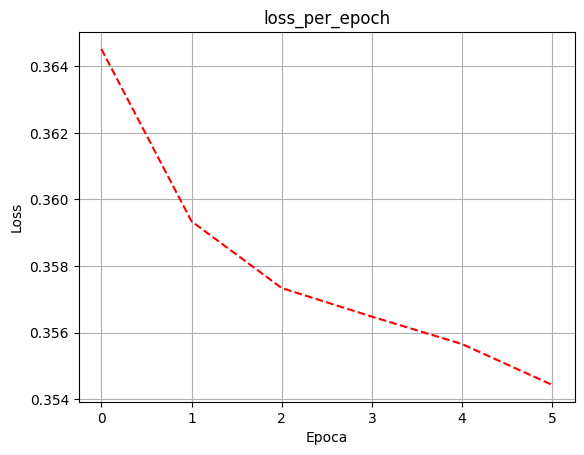

In [132]:
plt.xlabel('Epoca')
plt.ylabel('Loss')
plt.title('loss_per_epoch')
plt.grid(True)
plt.plot(loss_per_epoch,'r--')

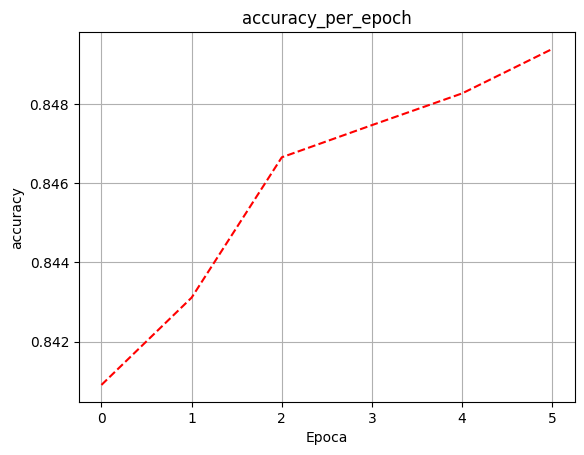

In [133]:
plt.xlabel('Epoca')
plt.ylabel('accuracy')
plt.title('accuracy_per_epoch')
plt.grid(True)
plt.plot(accuracy_per_epoch,'r--')

In [134]:
y_pred = model.predict(X_test_pca)
binary_predictions = (y_pred > 0.5).astype(int)
binary_predictions

12500/12500 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step


array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [135]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, binary_predictions)
mse

0.1506325

In [136]:
from sklearn.metrics import accuracy_score
acc =  accuracy_score(y_test,binary_predictions)
acc

0.8493675